# Palmer Penguins Clustering

## Dataset treatment

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from palmerpenguins import load_penguins
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = load_penguins()
df = df.dropna().reset_index(drop=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
df = pd.get_dummies(df, columns=["island", "sex"], drop_first=True)
df["species"] = df["species"].astype("category")
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,False,True,True
1,Adelie,39.5,17.4,186.0,3800.0,2007,False,True,False
2,Adelie,40.3,18.0,195.0,3250.0,2007,False,True,False
3,Adelie,36.7,19.3,193.0,3450.0,2007,False,True,False
4,Adelie,39.3,20.6,190.0,3650.0,2007,False,True,True
...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,2009,True,False,True
329,Chinstrap,43.5,18.1,202.0,3400.0,2009,True,False,False
330,Chinstrap,49.6,18.2,193.0,3775.0,2009,True,False,True
331,Chinstrap,50.8,19.0,210.0,4100.0,2009,True,False,True


In [5]:
X = df.drop("species", axis=1)
y = df["species"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_standardized = pd.DataFrame(X_scaled, columns=X.columns)

df_standardized

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0,0.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0,0.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,0.861818,0.797619,0.593220,0.361111,1.0,1.0,0.0,1.0
329,0.414545,0.595238,0.508475,0.194444,1.0,1.0,0.0,0.0
330,0.636364,0.607143,0.355932,0.298611,1.0,1.0,0.0,1.0
331,0.680000,0.702381,0.644068,0.388889,1.0,1.0,0.0,1.0


### Feature importance

In [6]:
f_values, p_values = f_classif(df_standardized, y)

anova_results = pd.DataFrame({"Feature": X.columns, "F-Value": f_values, "P-Value": p_values}).sort_values(
    by="F-Value", ascending=False
)

print(anova_results)

             Feature     F-Value        P-Value
2  flipper_length_mm  567.406992  1.587418e-107
0     bill_length_mm  397.299437   1.380984e-88
1      bill_depth_mm  344.825082   1.446616e-81
3        body_mass_g  341.894895   3.744505e-81
5       island_Dream  208.347193   3.063542e-59
6   island_Torgersen   43.988989   1.160083e-17
4               year    0.336387   7.145911e-01
7           sex_male    0.024088   9.762014e-01


## Clustering

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import apply_kmeans
from kmedoid import apply_kmedoids
from mst import run_mst_clustering
from ampl.ampl import compute_distance_matrix, write_ampl_dat, run_ampl_and_get_assignments
from utils import get_aligned_confusion_matrix, show_confusion_matrix, scatter_comparison

### KMeans

In [29]:
df["Cluster KMeans BiVariate"] = apply_kmeans(df_standardized[anova_results["Feature"][:2]], 3)
df["Cluster KMeans"] = apply_kmeans(df_standardized[anova_results["Feature"][:5]], 3)

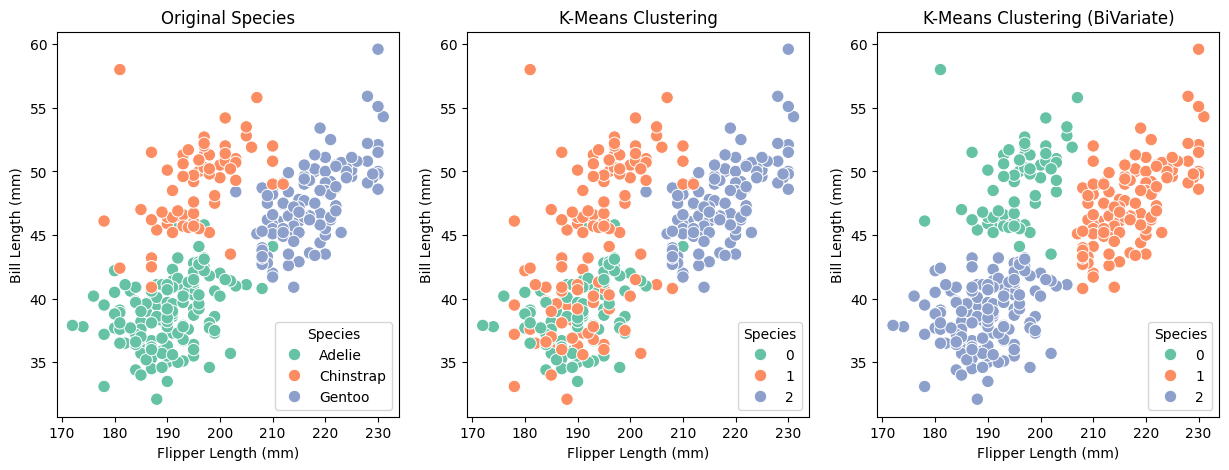

In [30]:
scatter_comparison(df, "species", "Cluster KMeans", "Cluster KMeans BiVariate", "K-Means")

#### Evaluation

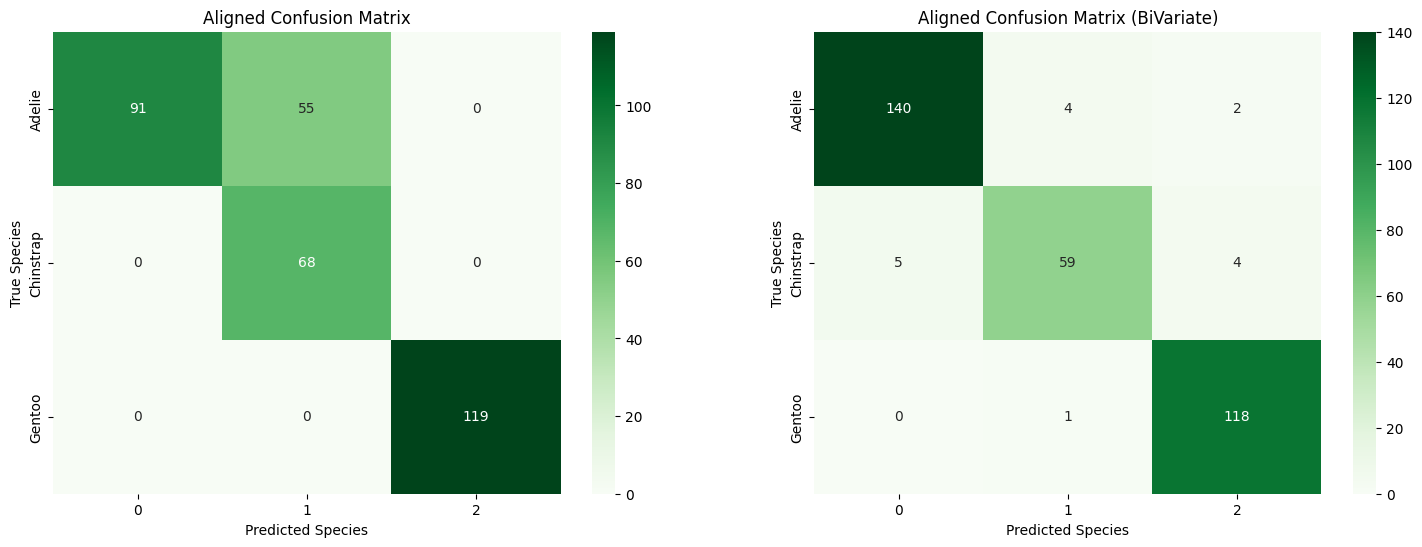

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster KMeans"), "Aligned Confusion Matrix", ax=ax[0]
)
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster KMeans BiVariate"),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[1],
)

### KMedoids

In [33]:
df["Cluster KMedoids BiVariate"] = apply_kmedoids(df_standardized[anova_results["Feature"][:2]], 3)
df["Cluster KMedoids"] = apply_kmedoids(df_standardized[anova_results["Feature"][:5]], 3)

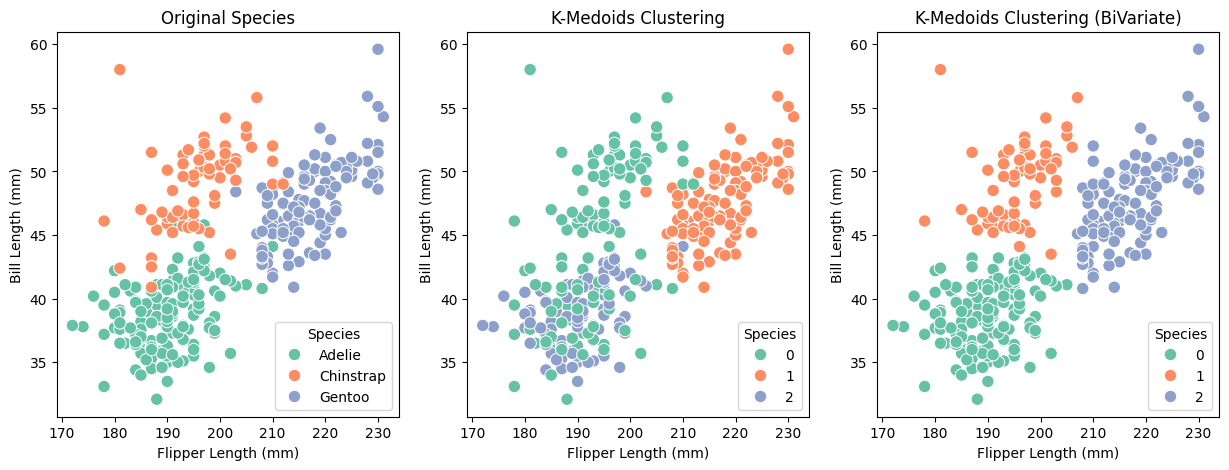

In [34]:
scatter_comparison(df, "species", "Cluster KMedoids", "Cluster KMedoids BiVariate", "K-Medoids")

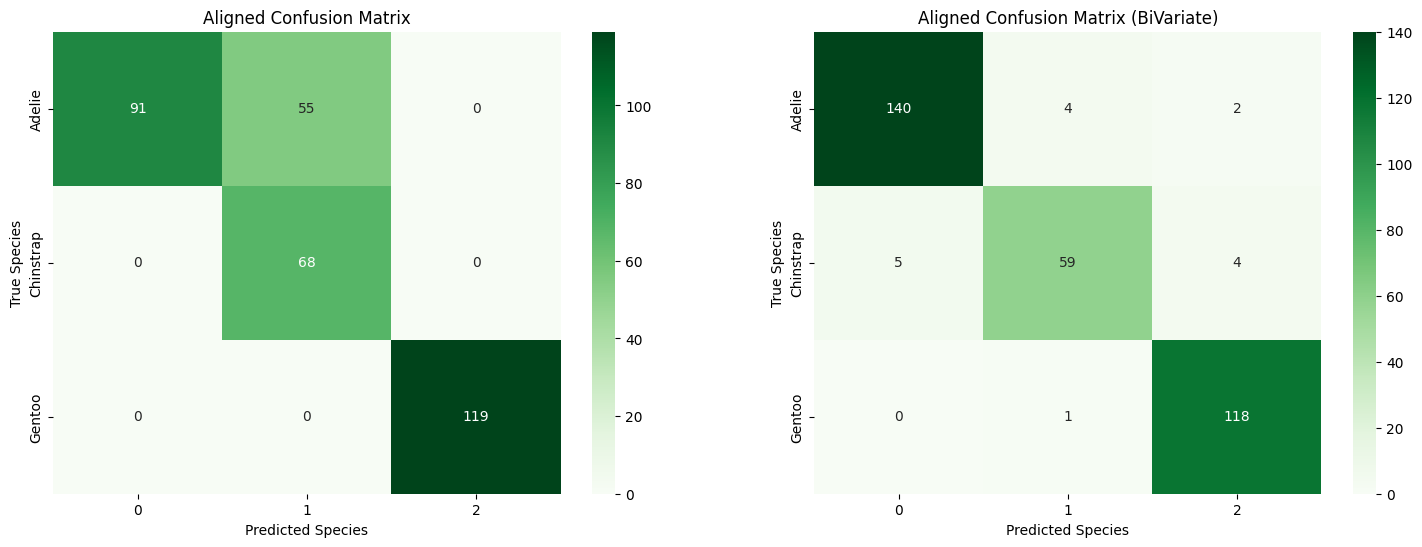

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster KMedoids"), "Aligned Confusion Matrix", ax=ax[0]
)
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster KMedoids BiVariate"),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[1],
)

### MST

In [14]:
df["Cluster MST BiVariate"] = run_mst_clustering(df_standardized[anova_results["Feature"][:2]], cutoff=2)
df["Cluster MST"] = run_mst_clustering(df_standardized, cutoff=2)

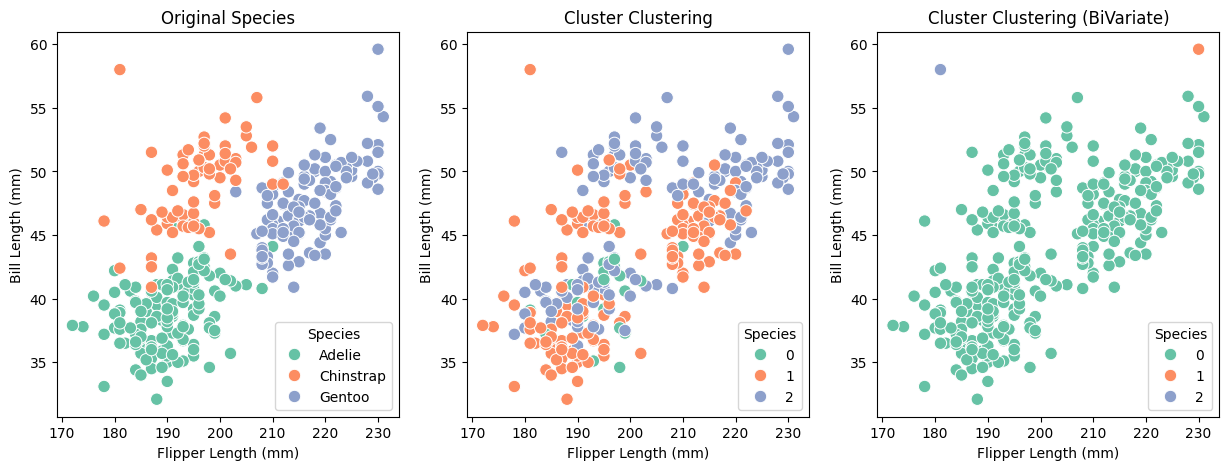

In [15]:
scatter_comparison(df, "species", "Cluster MST", "Cluster MST BiVariate", "Cluster")

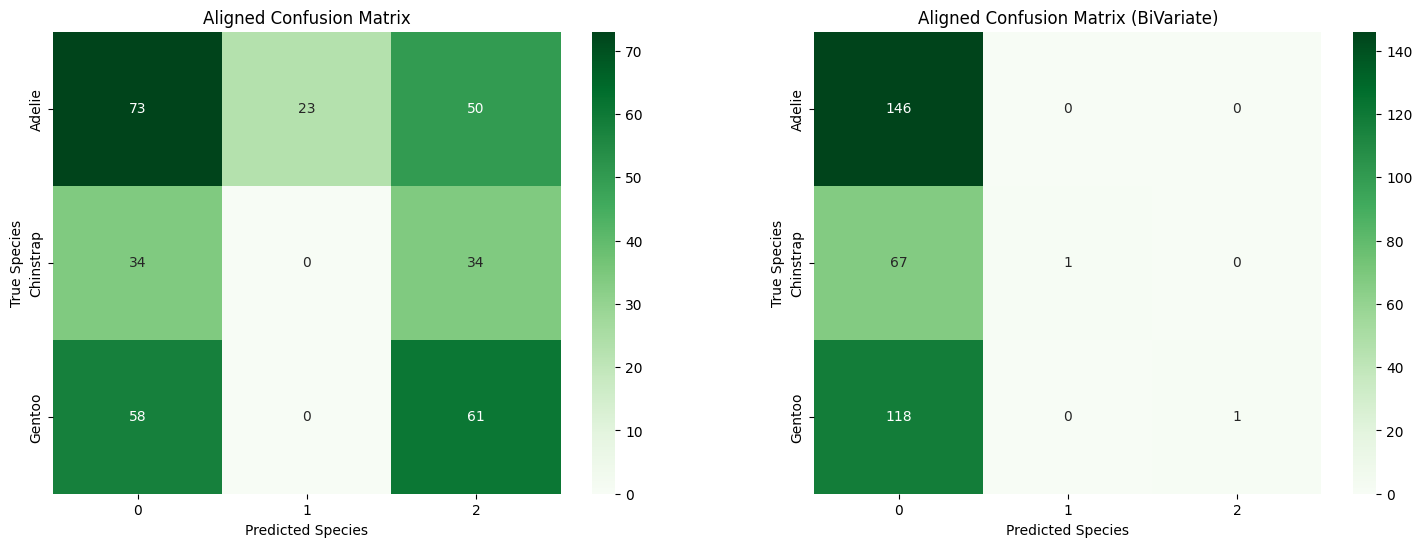

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
show_confusion_matrix(get_aligned_confusion_matrix(df, "species", "Cluster MST"), "Aligned Confusion Matrix", ax=ax[0])
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster MST BiVariate"),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[1],
)

### KMedoids AMPL

In [17]:
np_bivariate = compute_distance_matrix(df_standardized[anova_results["Feature"][:2]])
np_full = compute_distance_matrix(df_standardized)

In [25]:
write_ampl_dat(np_bivariate, 3)
df_bivariate = run_ampl_and_get_assignments()
write_ampl_dat(np_full, 3)
df_full = run_ampl_and_get_assignments()

CPLEX 22.1.2: CPLEX 22.1.2: optimal solution; objective 43.1569
23 simplex iterations
CPLEX 22.1.2: CPLEX 22.1.2: optimal solution; objective 244.9568
13 simplex iterations


In [26]:
df["Cluster AMPL"], _ = pd.factorize(df_full["AMPL"])
df["Cluster AMPL BiVariate"], _ = pd.factorize(df_bivariate["AMPL"])

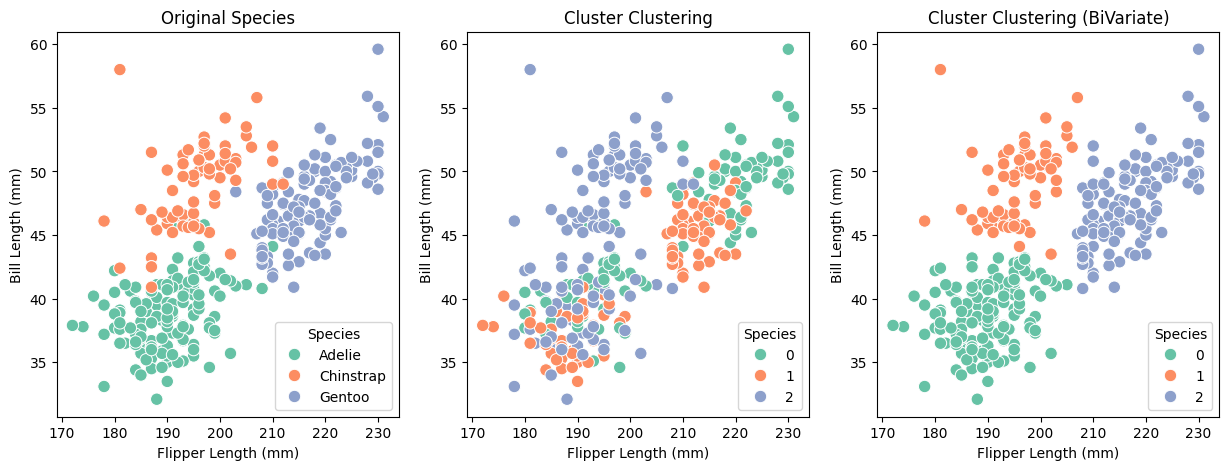

In [27]:
scatter_comparison(df, "species", "Cluster AMPL", "Cluster AMPL BiVariate", "Cluster")

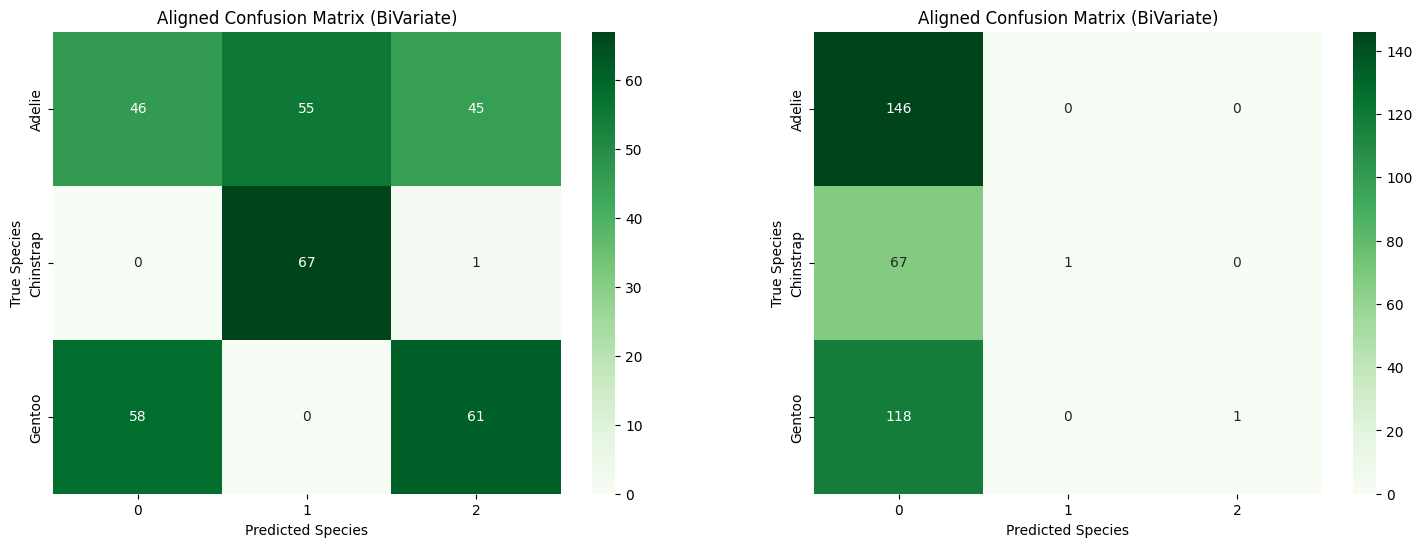

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster AMPL"), "Aligned Confusion Matrix (BiVariate)", ax=ax[0]
)
show_confusion_matrix(
    get_aligned_confusion_matrix(df, "species", "Cluster MST BiVariate"),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[1],
)

## Comparison

In [ ]:
def scatter_comparison(
    df: pd.DataFrame,
    original_column: str,
    predicted_column: str,
    predicted_bivariate_column: str,
    title: str,
) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    sns.scatterplot(
        ax=ax[0], data=df, x="flipper_length_mm", y="bill_length_mm", hue=original_column, palette="Set2", s=80
    )
    sns.scatterplot(
        ax=ax[1], data=df, x="flipper_length_mm", y="bill_length_mm", hue=predicted_column, palette="Set2", s=80
    )
    sns.scatterplot(
        ax=ax[2],
        data=df,
        x="flipper_length_mm",
        y="bill_length_mm",
        hue=predicted_bivariate_column,
        palette="Set2",
        s=80,
    )

    ax[0].set_xlabel("Flipper Length (mm)")
    ax[0].set_ylabel("Bill Length (mm)")
    ax[0].set_title("Original Species")
    ax[0].legend(title="Species")

    ax[1].set_xlabel("Flipper Length (mm)")
    ax[1].set_ylabel("Bill Length (mm)")
    ax[1].set_title(f"{title} Clustering")
    ax[1].legend(title="Species")

    ax[2].set_xlabel("Flipper Length (mm)")
    ax[2].set_ylabel("Bill Length (mm)")
    ax[2].set_title(f"{title} Clustering (BiVariate)")
    ax[2].legend(title="Species")